In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
result1 = df.groupby('vendor_id').agg({'id': 'count'}).sort_values('vendor_id', ascending=False)
result1.head()

,id
vendor_id,
2,780302
1,678342


Text(0, 0.5, 'vendor')

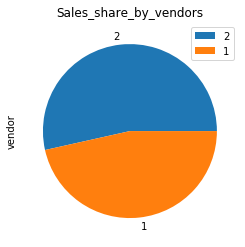

In [5]:
# Данный график построен, чтобы понять распределение количества поездок между вендорами
result1.plot(kind='pie', y='id')
plt.title('Sales_share_by_vendors')
plt.ylabel('vendor')

In [6]:
result = df.groupby('vendor_id').agg({'passenger_count': 'mean'}).sort_values('vendor_id', ascending=False)
result.head()

,passenger_count
vendor_id,
2,2.016720
1,1.259402


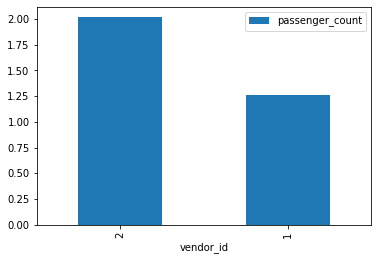

In [7]:
# Среднее количество пассажиров по вендорам
result.plot(kind='bar')

In [8]:
result2 = df.pivot_table(index = 'id', values = ('trip_duration'), aggfunc = 'mean')


In [9]:
result2 ['duration_min'] = result2['trip_duration']/60
result2.head()

,trip_duration,duration_min
id,,
id0000001,1105,18.416667
id0000003,1046,17.433333
id0000005,368,6.133333
id0000008,303,5.050000
id0000009,547,9.116667


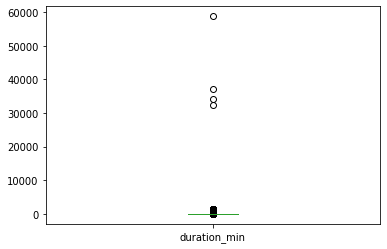

In [10]:
#просмотр распределения продолжительности поездки
result2['duration_min'].plot(kind='box')

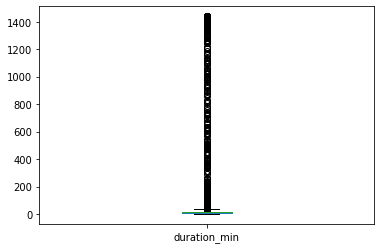

In [11]:
result2=result2[result2['duration_min'] < 30000]
#просмотр распределения продолжительности поездки с удалением "подозрительно большой длины поездки"
result2['duration_min'].plot(kind='box')

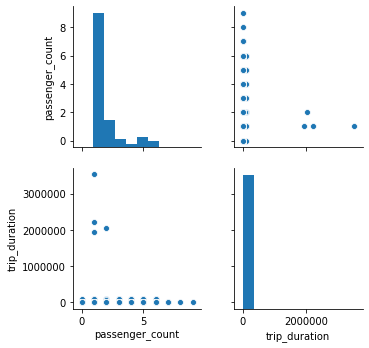

In [12]:
дли# смотрим взаимосвязь между количеством пассажиров и длительностью поездки
sns_plot = sns.pairplot(
    df[['passenger_count', 'trip_duration']])
sns_plot

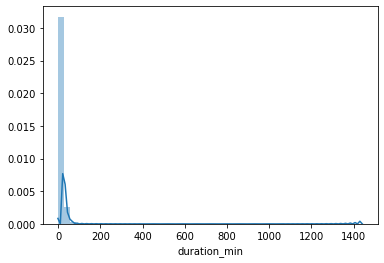

In [13]:
#посмотрим распределение по продолжительности поездки в минутах
sns.distplot(result2.duration_min)